In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
dataset = pd.read_csv('DAV_Project_dataset.csv')

In [15]:
from plotly.offline import init_notebook_mode, iplot, plot

data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=0.5,
        locations = dataset['Country'],
        locationmode = "country names",
        z = dataset['Happiness_Score'],
        text = dataset['Country'],
        colorbar = {'title' : 'Happiness Score'}
      )
layout = dict(title = 'Happiness Score distribution across the world',
              geo = dict(projection = {'type':'mercator'})
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [18]:
import plotly.express as px

fig = px.sunburst(dataset, path=['Region', 'Country'], values='Happiness_Score',
                  color='Happiness_Score', hover_data=['Happiness_Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(dataset['Happiness_Score'], weights=dataset['Happiness_Score']))
fig.update_layout(hovermode="x unified")
fig.show()

In [21]:
dataset.head()

,Year,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [39]:
fig = px.scatter(dataset,
                x = 'Family',
                y = 'Life_Expectancy',
                size = 'Economy_GDP',
                color = 'Happiness_Score',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'Family Support vs Life Expectancy from 2015-2019 <br> (Bubble size indicates Economy/GDP)')
fig.show()

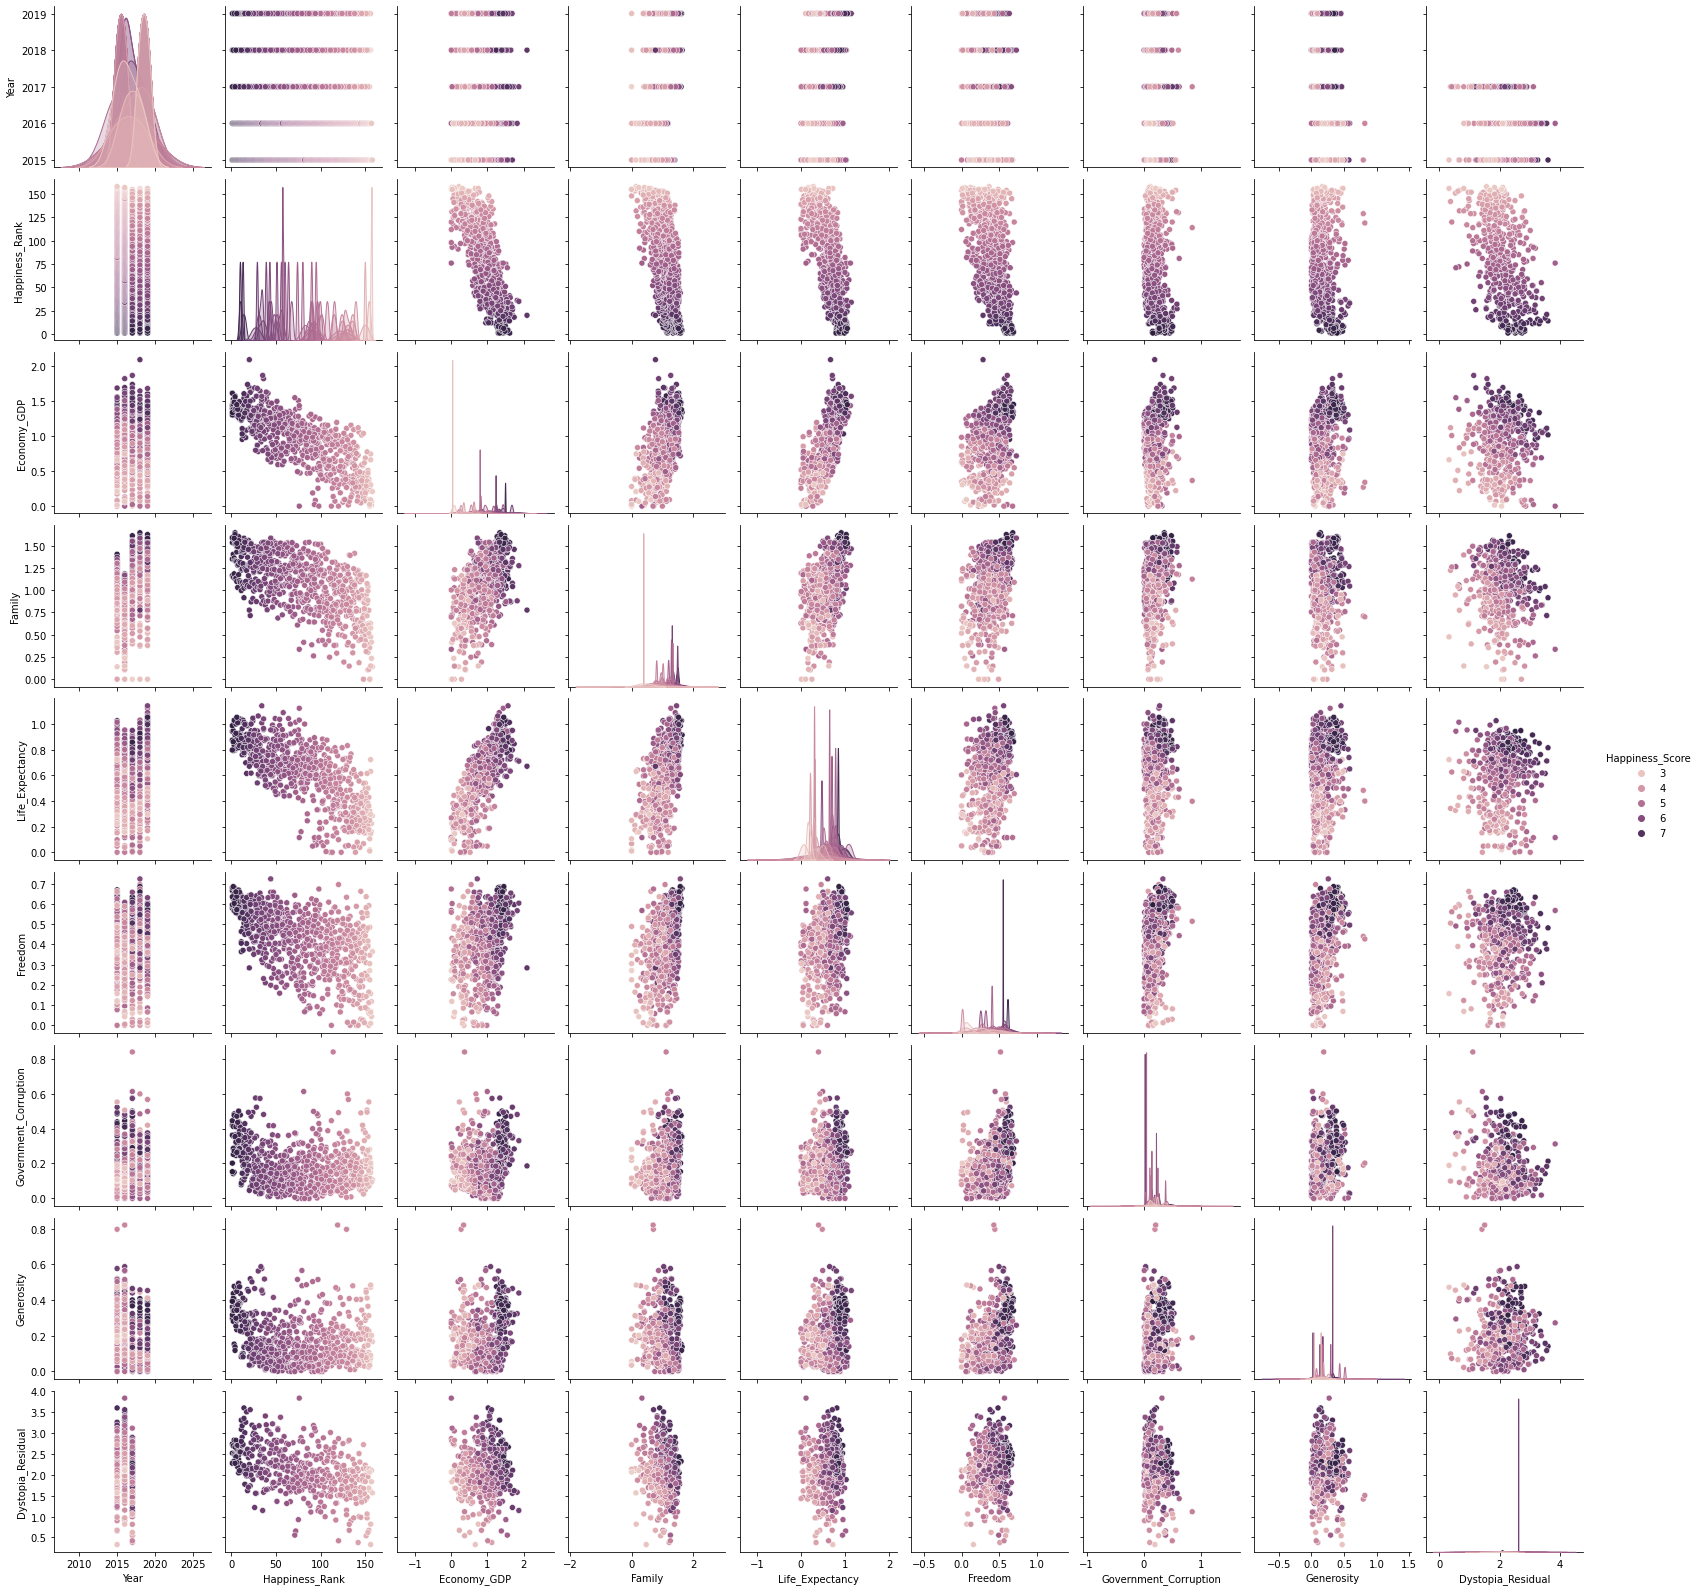

In [45]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(dataset, hue="Happiness_Score")

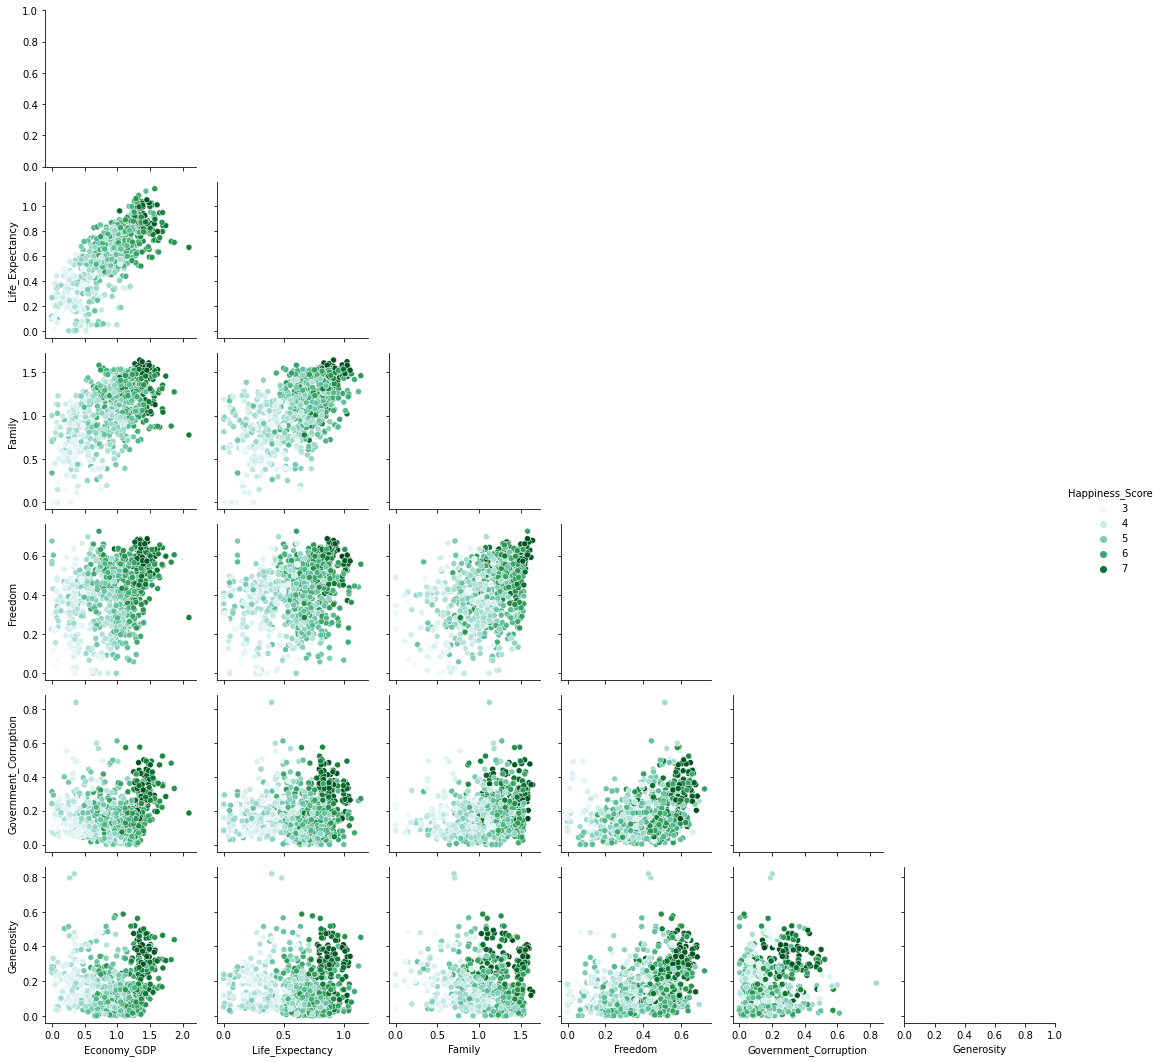

In [51]:
g = sns.PairGrid(data = dataset, vars = ['Economy_GDP','Life_Expectancy','Family','Freedom','Government_Corruption','Generosity'], 
                 hue = 'Happiness_Score', diag_sharey=False, corner = True, palette = 'BuGn')
g.map_lower(sns.scatterplot)
g.add_legend()

In [56]:
fig = px.treemap(dataset, path=['Region', 'Country'], values='Happiness_Score',
                  color=dataset['Happiness_Score'], hover_data=['Happiness_Rank'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(dataset['Happiness_Score'], weights=dataset['Happiness_Score']))
fig.show()

<Figure size 2160x1080 with 0 Axes>